# Determine the Cause of A Collision

## Business Understanding
*Introduction where you discuss the business problem and who would be interested in this project.*

A traffic accident may be caused by objective factors, such as weather, address type, condition of the road, light conditions, or due to human factors, such as inattention, speeding, drinking.If it is an objective reason, we need to improve the traffic conditions in the streets where collisions often occur.If it is a subjective reason, the corresponding evidence needs to be collected.When a traffic accident occurs, initial forecasts of the cause will facilitate the traffic police to investigate the accident. So the traffic office may be interested in this study.

## Data understanding

I will use the example data of traffic accidents in Seattle City. The data set recorded the weather, the condition of the road, the light conditions, when a collision happened，and the behavior of the driver. If a driver was inattention, speeding or under the influence of alcohol,  the accident was due to human factors.

**Feature selection**
+ "SEVERITYCODE":A code that corresponds to the severity of the collision:
    * 3—fatality;
    * 2b—serious injury;
    * 2—injury;
    * 1—prop damage;
    * 0—unknown.
+ "PERSONCOUNT": The total number of people involved in the collision.
+ "VEHCOUNT": The number of vehicles involved in the collision.
+ "ADDRTYPE":Collision address type
+ "WEATHER":A description of the weather conditions during the time of the collision.
+ "ROADCOND": The condition of the road during the collision.
+ "LIGHTCOND":The light conditions during the collision.
+ "INATTENTIONIND":Whether or not collision was due to inattention. (Y/N)
+ "UNDERINFL": Whether or not a driver involved was under the influence of drugs or alcohol.
+ "SPEEDING": Whether or not speeding was a factor in the collision. (Y/N)

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data-Collisions.csv")
df.shape

C:\Users\ZEEI0401314\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(194673, 38)

In [3]:
cols = ["SEVERITYCODE","PERSONCOUNT","VEHCOUNT","ADDRTYPE","WEATHER","ROADCOND","LIGHTCOND","INATTENTIONIND","UNDERINFL","SPEEDING"]
df = df[cols]
df.describe(include="all")

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,INATTENTIONIND,UNDERINFL,SPEEDING
count,194673.000000,194673.000000,194673.000000,192747,189592,189661,189503,29805,189789,9333
unique,NaN,NaN,NaN,3,11,9,9,1,4,1
top,NaN,NaN,NaN,Block,Clear,Dry,Daylight,Y,N,Y
freq,NaN,NaN,NaN,126926,111135,124510,116137,29805,100274,9333
mean,1.298901,2.444427,1.920780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.457778,1.345929,0.631047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### create a labeled  attribute

In [4]:
human_factors_cols = ["INATTENTIONIND","UNDERINFL","SPEEDING"]
for col in human_factors_cols:
    print(col,":",df[col].unique())

INATTENTIONIND : [nan 'Y']
UNDERINFL : ['N' '0' nan '1' 'Y']
SPEEDING : [nan 'Y']


In [5]:
df.loc[:,"UNDERINFL"] = df["UNDERINFL"].replace(["1","N","0"],["Y",np.nan,np.nan])

In [6]:
def statistic_human_factors(row):
    if row.any():
        return 1
    else:
        return 0    

In [7]:
df["HFACTORS"] = df[["INATTENTIONIND","UNDERINFL","SPEEDING"]].apply(statistic_human_factors,axis=1)  # human factors
df["HFACTORS"].value_counts()

0    149315
1     45358
Name: HFACTORS, dtype: int64

In [8]:
df.drop(["INATTENTIONIND","UNDERINFL","SPEEDING"],axis=1,inplace=True)

### Deal with missing data

In [9]:
for col in ['ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND']:
    print(df[col].unique())

['Intersection' 'Block' 'Alley' nan]
['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']
['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']
['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' nan
 'Unknown' 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']


In [10]:
df["LIGHTCOND"].replace(["Dark - Street Lights On","Dark - No Street Lights","Dark - Street Lights Off","Dark - Unknown Lighting"],["Dark"]*4,inplace=True)
df.replace("Unknown",np.nan,inplace=True)

In [11]:
df.dropna(how="any",inplace=True)
df.describe(include="all")

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,HFACTORS
count,169781.000000,169781.000000,169781.000000,169781,169781,169781,169781,169781.000000
unique,NaN,NaN,NaN,3,10,8,5,NaN
top,NaN,NaN,NaN,Block,Clear,Dry,Daylight,NaN
freq,NaN,NaN,NaN,107780,108507,121233,112339,NaN
mean,1.328111,2.505528,1.970026,NaN,NaN,NaN,NaN,0.257726
std,0.469527,1.411120,0.579383,NaN,NaN,NaN,NaN,0.437384
min,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,0.000000
50%,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,0.000000
75%,2.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000


In [12]:
df["HFACTORS"].value_counts()

0    126024
1     43757
Name: HFACTORS, dtype: int64

### Data Visualization

In [13]:
def objective_to_human_factors(df,x_col):
    
    labels = df[x_col].unique().tolist()
    objective_factors_count = df[df["HFACTORS"]==0].groupby(x_col).count()["HFACTORS"]
    objective_factors_count = objective_factors_count[labels].fillna(0).to_list()
    human_factors_count = df[df["HFACTORS"]==1].groupby(x_col).count()["HFACTORS"]
    human_factors_count = human_factors_count[labels].fillna(0).to_list()
    width = 0.4       # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()

    ax.bar(labels, human_factors_count, width, label='Human Factors')
    ax.bar(labels, objective_factors_count, width, bottom=human_factors_count,label='Objective Factors')
    
    ax.set_xticklabels(labels=labels, rotation=-90)

    ax.set_ylabel('Number')
    ax.set_title('The Number of Collisions Group by "%s"'%x_col)
    ax.legend()

    plt.show()

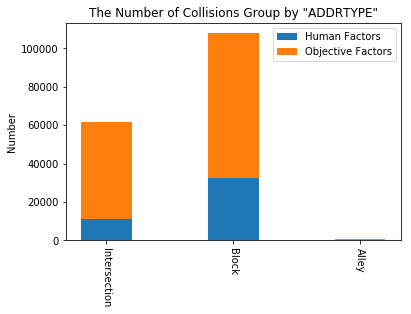

C:\Users\ZEEI0401314\Anaconda3\lib\site-packages\pandas\core\series.py:951: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


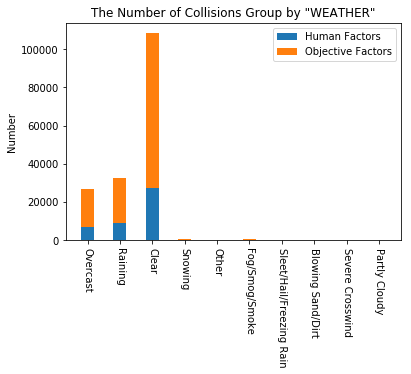

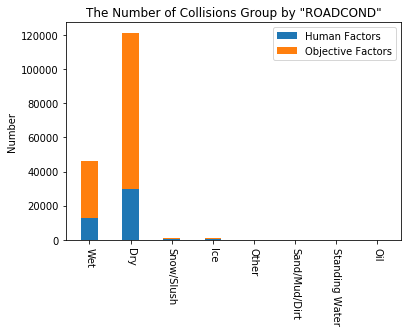

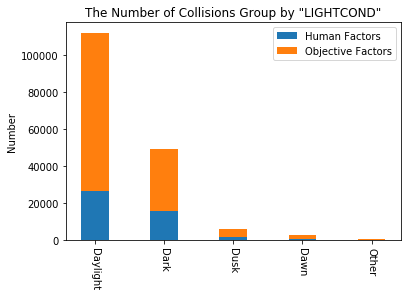

In [14]:
for col in ["ADDRTYPE","WEATHER","ROADCOND", "LIGHTCOND"]:
    objective_to_human_factors(df,col)

### One-Hot Encoding

In [15]:
df = pd.concat([df,pd.get_dummies(df[['ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND']])], axis=1)
df.drop(['ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND'], axis = 1,inplace=True)
print(df.columns)

Index(['SEVERITYCODE', 'PERSONCOUNT', 'VEHCOUNT', 'HFACTORS', 'ADDRTYPE_Alley',
       'ADDRTYPE_Block', 'ADDRTYPE_Intersection', 'WEATHER_Blowing Sand/Dirt',
       'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke', 'WEATHER_Other',
       'WEATHER_Overcast', 'WEATHER_Partly Cloudy', 'WEATHER_Raining',
       'WEATHER_Severe Crosswind', 'WEATHER_Sleet/Hail/Freezing Rain',
       'WEATHER_Snowing', 'ROADCOND_Dry', 'ROADCOND_Ice', 'ROADCOND_Oil',
       'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush',
       'ROADCOND_Standing Water', 'ROADCOND_Wet', 'LIGHTCOND_Dark',
       'LIGHTCOND_Dawn', 'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk',
       'LIGHTCOND_Other'],
      dtype='object')


### Normalize Data

In [16]:
from sklearn.preprocessing import StandardScaler
y = df.pop("HFACTORS").values
X= StandardScaler().fit(df).transform(df)

C:\Users\ZEEI0401314\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ZEEI0401314\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Modeling

Split the datasets into train data and test data.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (135824, 29) (135824,)
Test set: (33957, 29) (33957,)


### K Nearest Neighbor(KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

neigh = KNeighborsClassifier().fit(X_train,y_train)
y_neigh = neigh.predict(X_test)

In [19]:
neigh.score(X_test, y_test)

0.7247990105132962

### Support Vector Machine(SVM)

In [20]:
from sklearn import svm
csvm = svm.SVC(kernel='rbf')
csvm.fit(X_train, y_train) 
y_svm = csvm.predict(X_test)

C:\Users\ZEEI0401314\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
csvm.score(X_test, y_test)

0.7463556851311953

### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
dt.fit(X_train,y_train)
y_dt = dt.predict(X_test)

In [23]:
dt.score(X_test, y_test)

0.7477692375651559

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01).fit(X_train,y_train)
y_lr = lr.predict(X_test)

C:\Users\ZEEI0401314\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
lr.score(X_test, y_test)

0.745089377742439

## Evaluation

In [27]:
from sklearn.metrics import jaccard_similarity_score,f1_score

df_score = pd.DataFrame(columns=["Algorithm","Jaccard","F1-score"])
df_score.set_index("Algorithm",inplace=True)

for alg,y_pred in zip(["KNN","SVM","Decision Tree","LogisticRegression"],[y_neigh,y_svm,y_dt,y_lr]):    
    
    df_score.loc[alg,"Jaccard"] = jaccard_similarity_score(y_test,y_pred)
    df_score.loc[alg,"F1-score"] = f1_score(y_test,y_pred)  
   
print(df_score)

                     Jaccard   F1-score
Algorithm                              
KNN                 0.724799   0.207446
SVM                 0.746356   0.106443
Decision Tree       0.747769   0.181558
LogisticRegression  0.745089  0.0163636


In [28]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report of 'KNN':
               precision    recall  f1-score   support

           0       0.76      0.92      0.83     25310
           1       0.39      0.14      0.21      8647

   micro avg       0.72      0.72      0.72     33957
   macro avg       0.57      0.53      0.52     33957
weighted avg       0.66      0.72      0.67     33957

Confusion matrix, without normalization
[[23389  1921]
 [ 7424  1223]]
Classification Report of 'SVM':
               precision    recall  f1-score   support

           0       0.75      0.98      0.85     25310
           1       0.52      0.06      0.11      8647

   micro avg       0.75      0.75      0.75     33957
   macro avg       0.64      0.52      0.48     33957
weighted avg       0.69      0.75      0.66     33957

Confusion matrix, without normalization
[[24831   479]
 [ 8134   513]]
Classification Report of 'Decision Tree':
               precision    recall  f1-score   support

           0       0.76      0.97      0

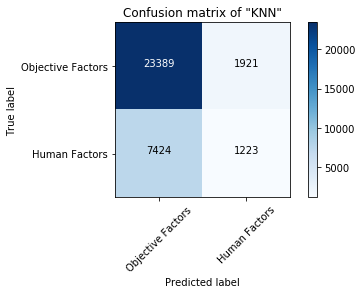

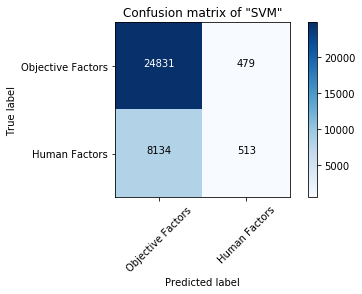

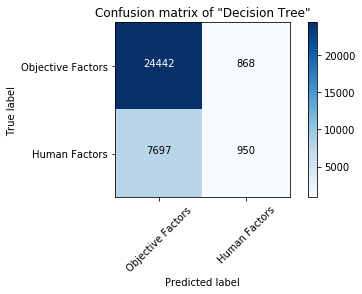

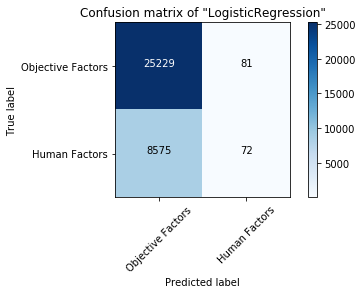

In [29]:
from sklearn.metrics import classification_report
for alg,y_pred in zip(["KNN","SVM","Decision Tree","LogisticRegression"],[y_neigh,y_svm,y_dt,y_lr]): 
    print("Classification Report of '%s':\n"%alg, classification_report(y_test, y_pred))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["Objective Factors","Human Factors"], normalize= False,  title='Confusion matrix of "%s"'%alg)